In [33]:
# importing some basic libraries
import numpy as np
import pandas as pd

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [34]:
file_path = 'c:/Users/jaewo/python-workspace/기초인공지능/'
file_name = 'iris_dataset.csv'
iris = file_path + file_name
def data_preprocessing(iris):
    data = pd.read_table(iris, sep = ',')
    data = data.to_numpy()
    np.random.shuffle(data)
    train_data, test_data = data[:-(len(data)//5),:], data[-(len(data)//5):,:]
    return train_data, test_data

In [35]:
def svm_fitting(data):
    x = data[:,:-1]
    y = data[:, -1]
    lr = 0.1
    epoch = 10000
    
    y1 = np.zeros(len(y))
    for i in range(len(y)):
        if y[i]=='setosa':
            y1[i] = 1
        elif y[i]=='versicolor':
            y1[i] = -1
    w1 = np.zeros(len(x[0]))
    for e in range(epoch):
        for i, val in enumerate(x):
            z = np.dot(x[i], w1)
            if(y1[i]*z < 1):
                w1 = w1 + lr*((y1[i]*x[i])-(2*(1/epoch)*w1))
            else:
                w1 = w1 + lr*(-2*(1/epoch)*w1)
                
    y2 = np.zeros(len(y))
    for i in range(len(y)):
        if y[i]=='versicolor':
            y2[i] = 1
        elif y[i]=='virginica':
            y2[i] = -1
    w2 = np.zeros(len(x[0]))
    for e in range(epoch):
        for i, val in enumerate(x):
            z = np.dot(x[i], w2)
            if(y2[i]*z < 1):
                w2 = w2 + lr*((y2[i]*x[i])-(2*(1/epoch)*w2))
            else:
                w2 = w2 + lr*(-2*(1/epoch)*w2)
    
    y3 = np.zeros(len(y))
    for i in range(len(y)):
        if y[i]=='virginica':
            y3[i] = 1
        elif y[i]=='setosa':
            y3[i] = -1
    w3 = np.zeros(len(x[0]))
    for e in range(epoch):
        for i, val in enumerate(x):
            z = np.dot(x[i], w3)
            if(y3[i]*z < 1):
                w3 = w3 + lr*((y3[i]*x[i])-(2*(1/epoch)*w3))
            else:
                w3 = w3 + lr*(-2*(1/epoch)*w3)
    
    return [w1, w2, w3]

In [36]:
def svm_prediction(w, test_data):
    x = test_data[:,:-1]
    y = test_data[:, -1]
    pred = []
    for i, val in enumerate(x):
        z1 = np.dot(x[i], w[0])
        z2 = np.dot(x[i], w[1])
        z3 = np.dot(x[i], w[2])
        if(z1 > 1 and z3 < 1):
            pred.append('setosa')
        elif(z1 < 1 and z2 > 1):
            pred.append('versicolor')
        else:
            pred.append('virginica')
    match = 0
    for i in range(len(y)):
        if y[i]==pred[i]:
            match = match+1
    print(match*100/len(y))
    return pred

In [37]:
def svm_visualization(train_data, test_data, prediction):
    x_train = train_data[:,0]
    y_train = train_data[:,1]
    z_train = train_data[:,2]
    target_train = train_data[:,-1]
    x_test = test_data[:,0]
    y_test = test_data[:,1]
    z_test = test_data[:,2]
    target_test = test_data[:,-1]
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')    
    ax.plot(x_train[target_train=='setosa'], y_train[target_train=='setosa'], z_train[target_train=='setosa'], c = 'red')
    ax.plot(x_train[target_train=='versicolor'], y_train[target_train=='versicolor'], z_train[target_train=='versicolor'], c = 'blue')
    ax.plot(x_train[target_train=='virginica'], y_train[target_train=='virginica'], z_train[target_train=='virginica'], c = 'green')
    ax.plot(x_test[target_test=='setosa'], y_test[target_test=='setosa'], z_test[target_test=='setosa'],  c = 'magenta')
    ax.plot(x_test[target_test=='versicolor'], y_test[target_test=='versicolor'], z_test[target_test=='versicolor'], c = 'cyan')
    ax.plot(x_test[target_test=='virginica'], y_test[target_test=='virginica'], z_test[target_test=='virginica'], c = 'yellow')
    plt.show()

In [38]:
train_data, test_data = data_preprocessing(iris)
print(test_data[:, -1])

['setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa' 'setosa']


In [39]:
w = svm_fitting(train_data)

In [40]:
prediction = svm_prediction(w, test_data)
print(prediction)

90.0
['setosa', 'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa']


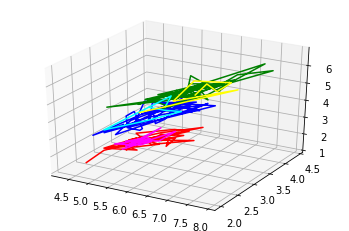

In [41]:
svm_visualization(train_data, test_data, prediction)